## Predicting Customer Turnover in Telecom Company

## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced / part time / full time: PART TIME
* Scheduled project review date/time: 01 August 2022
* Instructor name: ABHINEET KULKARNI
* Blog post URL: https://www.blogger.com/blog/post/edit/4076241086869822975/590859689852619150

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data Prep
This data set is from Kaggle and is used to predict customer turnover. 

In [2]:
df = pd.read_csv('telecom.csv')

In [3]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### removing unnecessary columns
These coefficients have no impact in our analysis

In [4]:
remove = ['state','area code', 'phone number', 'account length']

In [5]:
df = df.drop(remove, axis = 1)

#### Creating dummy variables

The get_dummies() function is used to convert categorical variable into dummy/indicator variables. 
Here "drop_first=True" is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

In [6]:
#Creating Dummy Variables
df2 = pd.get_dummies(df, drop_first = True)

#### Looking at Data types and converting 
First we look at the data object type, and see if they are all numerical values, if not they are converted to a numerical value. Looking, we see churn is a boolean, which shows either "True" or "False" when looking at the dataframe. Therefore we convert it into a numerical value by converting to integer.

INT64 is for storing whole numbers. Whereas FLOAT and are used to stored decimal values.

By converting Boolean to integer, False becomes 0 and True becomes 1.

In [7]:
print(df2.dtypes)

number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
international plan_yes      uint8
voice mail plan_yes         uint8
dtype: object


In [8]:
df3 = df2.astype({"churn":'int64'})

In [9]:
#This cell confirms that the churn type has changed from boolean to integer
print(df3.dtypes)

number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
international plan_yes      uint8
voice mail plan_yes         uint8
dtype: object


#### Visualization of 'Churn'
Here 1, represents churn where the customer has left the company. Notice there is a an imbalance. This will be tackled later on.

<AxesSubplot:xlabel='churn', ylabel='count'>

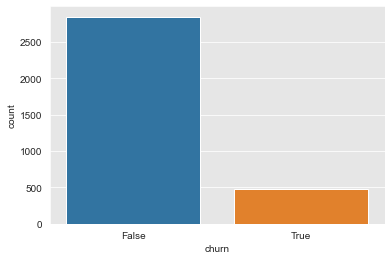

In [73]:
#Visualization of Churn counts
sn.countplot(x='churn',data=df)

### Identify X & Y, and Logistic Regression using Statsmodels
Prior to running and building our machine learning models, need to look at correlation with our target variable. 
We do so by looking at the P-value of the coefficients. A P value <= 0.05 has statistical significance. 

Logistic regression is the type of regression analysis used to find the probability of a certain event occurring. It is the best suited type of regression for cases where we have a categorical dependent variable which can take only discrete values.

First we identify are our target (Y) and response variables (X).|


In [11]:
#identify Y (Target) Variables and Response Variables (X)
y = df3['churn']
X = df3.drop('churn', axis = 1)

In [12]:
import statsmodels.api as sm
# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.323896
         Iterations 7


In the output, ‘Iterations‘ refer to the number of times the model iterates over the data, trying to optimize the model. By default, the maximum number of iterations performed is 35, after which the optimization fails.

#### Understanding the Logistic Regression Summary

**coef** : the coefficients of the independent variables in the regression equation.

***Log-Likelihood***: the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.

***LL-Null*** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).

***Pseudo R-squ.***: a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

***z*** : The z-value is the regression coefficient divided by standard error. If the z-value is too big in magnitude, it indicates that the corresponding true regression coefficient is not 0 and the corresponding X-variable matters.

***std err***: The standard error is a measure of uncertainty of the logistic regression coefficient. It is useful for calculating the p-value and the confidence interval for the corresponding coefficient.

***P>|z|*** : represents the p-value associated with the value in the z value column. If the p-value is less than a certain significance level (e.g. P <= 0 . 05) then this indicates that the predictor variable has a statistically significant relationship with the response variable in the model.

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           16
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.2172
Time:                        15:39:45   Log-Likelihood:                -1079.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                3.381e-117
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.5682      0.711    -12.058      0.000      -9.961      -7.175
number vmail messages      0.0360      0.018      1.996      0.046       0.001       0.071
total day minutes         -0.2255      3.274     -0.069      0.945      -6.643       6.192
total day calls            0.0032      0.003      1.171      0.242      -0.002       0.009
total day charge           1.4027     19.260      0.073      0.942     -36.346      39.151
total eve minutes          0.7965      1.635      0.487      0.626      -2.408       4.001
total eve calls            0.0011      0.003      0.394      0.694      -0.004       0.007
total eve charge          -9.2859     19.237     -0.483      0.629     -46.990      28.419
total night minutes       -0.1244      0.876     -0.142      0.887      -1.842       1.593
total night calls          0.0007      0.003      0.235      0.814      -0.005       0.006
total night charge         2.8458     19.474      0.146      0.884     -35.322      41.014
total intl minutes        -4.3477      5.301     -0.820      0.412     -14.738       6.043
total intl calls          -0.0926      0.025     -3.699      0.000      -0.142      -0.044
total intl charge         16.4268     19.634      0.837      0.403     -22.055      54.908
customer service calls     0.5139      0.039     13.089      0.000       0.437       0.591
international plan_yes     2.0457      0.145     14.067      0.000       1.761       2.331
voice mail plan_yes       -2.0262      0.574     -3.527      0.000      -3.152      -0.900
==========================================================================================
"""

#### Selecting columns  that have significant p <=0.05
These variables will be selected, as they have a P-Value P<= 0.05. 
The rest have no statistical significance with target variable

In [14]:
cols = ['number vmail messages', 'total intl calls','customer service calls', 'international plan_yes', 
       'voice mail plan_yes']

#### Re-running Logistic Regression Model, this time to look at Odds Ratio

In [15]:
#Re-running Logistic Regression with selected columns 
X = df3[cols]
y= df3['churn']


# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.357354
         Iterations 7


#### Odds Ratio
In logistic regression the odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.

Odds ratios (OR) are used to compare the relative odds of the occurrence of the outcome of interest, given exposure to the variable of interest. The odds ratio can also be used to determine whether a particular exposure is a risk factor for a particular outcome.

***OR=1*** Exposure does not affect odds of outcome

***OR>1*** Exposure associated with higher odds of outcome

***OR<1*** Exposure associated with lower odds of outcome


In [16]:
#Statistical information regarding confidence intervals, P-values and Odds Ration
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                        CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                       0.071474       0.123442    0.093930   0.000
number vmail messages       0.999389       1.067332    1.032801   0.054
total intl calls            0.885699       0.971003    0.927371   0.001
customer service calls      1.447970       1.670960    1.555474   0.000
international plan_yes      5.469707       9.319230    7.139570   0.000
voice mail plan_yes         0.057695       0.468068    0.164333   0.001


#### Interpreting Odds Ratio 
Individuals who had ***International Plan*** , has an odds ratio greater than one. They are 7 times more likely to leave.

Also customers who have made ***customer service calls*** are 55% more likely to leave

Customers who make ***international calls*** are 8% less likely to leave, and customers who have a ***voicemail plan*** are 84% less likely to leave

#### Prepping for The Machine Learning Models
First, we identify our 'Y', in which case is 'churn' and our 'X' will be the columns who had strong statistical relevance with our target variable 'Y', as I discussed above.

Also using value counts, I wanted to look at class distribution of churn. That is what 'value_counts' provides.

By setting 'normalize=True' , the object returned will contain the relative frequencies of the unique values. 

In [17]:
target = ['churn']
X = df3[cols]
y= df3[target]

In [18]:
# Class distribution - Pre-SMOTE
print('Original class distribution: \n')
print(y.value_counts())
print(y.value_counts(normalize = True))

Original class distribution: 

churn
0        2850
1         483
dtype: int64
churn
0        0.855086
1        0.144914
dtype: float64


#### Train Test Split 
Train Test Split here splits the data into test sets and train sets. We set the test size to 0.25, or 25% of the data.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

#### SMOTE: Synthetic Minority Over-sampling Technique
Because 86% of our data was 'not churn' and 14% was 'Churn', there is a large class imbalance. This will be fixed using SMOTE

SMOTE stands for **Synthetic Minority Oversampling**. Here, rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.

In [20]:
smote = SMOTE(random_state = 777)
X_train, y_train = smote.fit_sample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(y_train.value_counts())

-----------------------------------------
Synthetic sample class distribution: 

churn
0        2127
1        2127
dtype: int64


#### Performing Standardization of Data
Standardize features by removing the mean and scaling to unit variance.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train.copy())
X_test = scaler.transform(X_test.copy())

In [22]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

## LOGISTIC REGRESSION

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using Solver, which is an algorithm used in the optimization problem. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.


Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. 

we fit the data, and then use ***.best_params_*** which tells use the best parameters for our model.
Lastly given the parameters to use, we Instantiate them model with set parameters.

In [23]:
log_clf = LogisticRegression()

In [24]:
#Parameters for GridSearchCV
log_grid = {'solver': ['liblinear', 'sag', 'saga']}

In [25]:
log = GridSearchCV(log_clf, log_grid, scoring = 'accuracy', cv = 3 )

In [26]:
log.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [27]:
log.best_params_

{'solver': 'liblinear'}

In [28]:
log = LogisticRegression(solver = 'liblinear', random_state = 777)

### Drawing ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

**True Positive Rate** The true positive rate (TPR, also called sensitivity). TPR is the probability that an actual positive will test positive.

**False Positive Rate** The False Positive Rate (FPR, or “Fall-Out”), is the proportion of negative cases incorrectly identified as positive cases in the data (i.e. the probability that false alerts will be raised).

In [29]:
from sklearn.metrics import roc_curve, auc

#Used to calculate the probability of scores of each of the datapoints
y_score = log.fit(X_train, y_train.values.ravel()).decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_score)

### Area Under The Curve (AUC)
The Area Under the Curve (AUC) is the measure of the ability of a classifier(In this case Logistic Regression) to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. 

In [30]:
#calculating the AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.784649795023239


AUC: 0.784649795023239


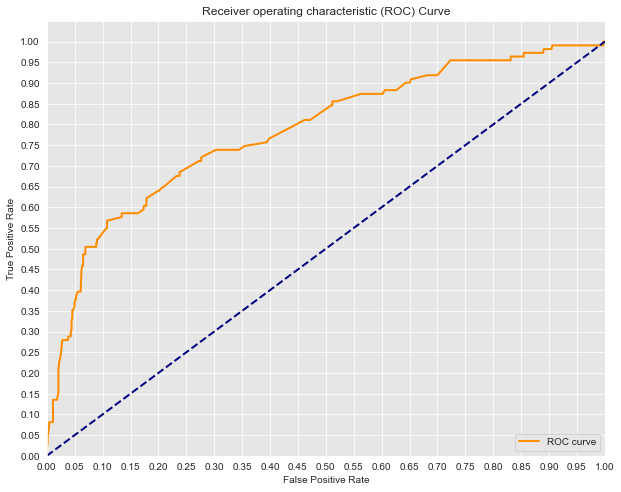

In [31]:
#Visualization of the AUC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### The Area Under the Curve (AUC) in this case our model has a score of 0.78/1.00 or 78%

### Confusion matrix for binary classification 
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

I already discussed the true positive rate, and the false positive rate.

The other two included in the confusion matrix are 

***true negative rate(TN)*** - A test result that correctly indicates the absence of a condition or characteristic

***false negative  rate (FN)*** - A test result which wrongly indicates that a particular condition or attribute is absent

First we create predictions

Next, using the confusion plot we  Y_test set with predictions to get True Positive Rate, False Positive Rate, True Negative Rate, and False Negative  Rate.

In [32]:
#predictions on Test set
predictions = log.predict(X_test)

In [33]:
#Calculating the accuracy score by comparing the actual values and predicted values.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
#TN, FP, FN, TP = confusion_matrix(y_test, predictions)

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  82
False Positive(FP) =  220
True Negative(TN)  =  503
False Negative(FN) =  29
Accuracy of the binary classification = 0.701


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


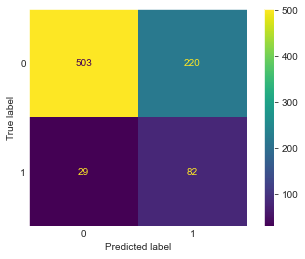

In [34]:
#Visual Representation of the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log,X_test,y_test, )
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

#### Classification report

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

4. Accuracy: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.



In [35]:
#evaluation metrics of Logistic Regression Model
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       723
           1       0.27      0.74      0.40       111

    accuracy                           0.70       834
   macro avg       0.61      0.72      0.60       834
weighted avg       0.86      0.70      0.75       834



#### Interpretation of classificatiion report
Precision: Out of all the customer that the model predicted would get turnover, only 27% actually did.

Recall: Out of all the cusomters that actually did turnover, the model only predicted this outcome correctly for 74% of those players

f1 score: with an f1 score of 0.40, the model did a poor job of predicting whether or not customers will turnover('churn').


#### The Confusion matrix performance on the Logistic Regresson classifier shows accuracy score of 70%

## KNN - K-NEAREST NEIGHBORS

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems.


First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using n_neighbors, which is number of neighbors required for each sample

Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [36]:
knn_clf = KNeighborsClassifier()

In [37]:
knn_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8]
}

In [38]:
knn = GridSearchCV(knn_clf, knn_grid, scoring = 'accuracy', cv = 3 )

In [39]:
knn.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [40]:
knn.best_params_

{'n_neighbors': 7}

In [41]:
#Updating classifier with best paramters
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [42]:
knn_prediction = knn.predict(X_test)

### Confusion Matrix with KNN Algorithm

In [43]:
# Evaluating KNN Algorithm
print(confusion_matrix(y_test,knn_prediction))


TN, FP, FN, TP = confusion_matrix(y_test, knn_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[682  41]
 [ 71  40]]
True Positive(TP)  =  40
False Positive(FP) =  41
True Negative(TN)  =  682
False Negative(FN) =  71
Accuracy of the binary classification = 0.866


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


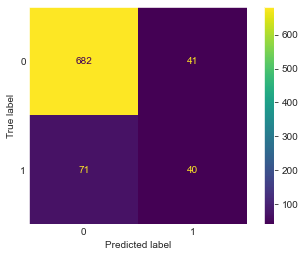

In [44]:
plot_confusion_matrix(knn,X_test,y_test)

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

### KNN Classification Report

In [45]:
print (classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       723
           1       0.49      0.36      0.42       111

    accuracy                           0.87       834
   macro avg       0.70      0.65      0.67       834
weighted avg       0.85      0.87      0.86       834



#### Interpretation of classificatiion report
Precision: Out of all the customer that the model predicted would get turnover, only 49% actually did.

Recall: Out of all the cusomters that actually did turnover, the model only predicted this outcome correctly for 36% of those players

f1 score: with an f1 score of 0.42, the model did a poor job of predicting whether or not customers will turnover('churn').


#### The Confusion matrix performance on the KNN classifier shows accuracy score of 87%

## DECISION TREE ALGORITHM

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The nonparametric method refers to a type of statistic that does not make any assumptions about the characteristics of the sample (its parameters) or whether the observed data is quantitative or qualitative.


First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using criterion, which is the function to measure of quality of split. Entropy can be defined as a measure of the purity of the sub split. max_depth, is the maximum depth of the tree. min_samples_split, is the minimum number of samples required to split an internal node


Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [46]:
dt_clf = DecisionTreeClassifier()

In [47]:
#Parameters for GridSearchCV
dt_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]}

In [48]:
dt = GridSearchCV(dt_clf, dt_grid, scoring = 'accuracy', cv = 3 )

In [49]:
dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [50]:
dt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [51]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 2)

In [52]:
dt.fit(X,y.values.ravel())

DecisionTreeClassifier(max_depth=10)

### Decision Tree Confusion matrix

In [55]:
print(confusion_matrix(y_test,dt_prediction))
dt_prediction = dt.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, dt_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[682  41]
 [ 70  41]]
True Positive(TP)  =  41
False Positive(FP) =  41
True Negative(TN)  =  682
False Negative(FN) =  70
Accuracy of the binary classification = 0.867


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


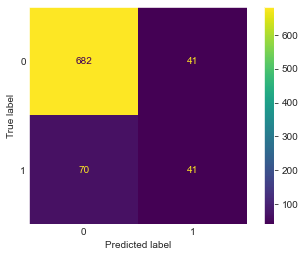

In [56]:
dt_prediction = dt.predict(X_test)
plot_confusion_matrix(dt,X_test,y_test)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

### Feature Importance using Decison Trees

Feature importance, simply put, the higher the value the more important it is

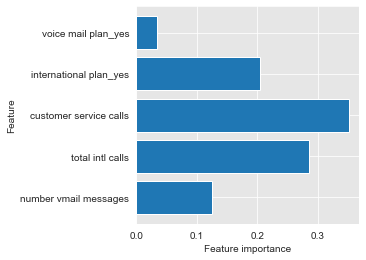

In [57]:
#Visualization of feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4,4))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

##### Simply Put, the larger the value the more important the feature.  Recall earlier, that customers who have made customer service calls are 55% more likely to leave.

### Decision Tree Classification Report

In [58]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       723
           1       0.50      0.37      0.42       111

    accuracy                           0.87       834
   macro avg       0.70      0.66      0.67       834
weighted avg       0.85      0.87      0.86       834



#### Interpretation of classificatiion report
Precision: Out of all the customer that the model predicted would get turnover, only 50% actually did.

Recall: Out of all the cusomters that actually did turnover, the model only predicted this outcome correctly for 37% of those players

f1 score: with an f1 score of 0.42, the model did a poor job of predicting whether or not customers will turnover('churn').


#### The Confusion matrix performance on the Decision Tree classifier shows accuracy score of 87%

### Random Forests Model

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

Next we set the paramerters for grid searchCV. Here we are using n_estimators, which is the number of trees in the forest. max_depth, is the maximum depth of the tree.

Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [59]:
rf_clf = RandomForestClassifier()

In [60]:
rf_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'max_depth': [1,2,3,4,5],}

In [61]:
rf = GridSearchCV(rf_clf, rf_grid, scoring = 'accuracy', cv = 3 )

In [62]:
rf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [63]:
rf.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [64]:
rf = RandomForestClassifier(max_depth = 1, n_estimators = 100, random_state = 123)

In [65]:
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=1, random_state=123)

/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


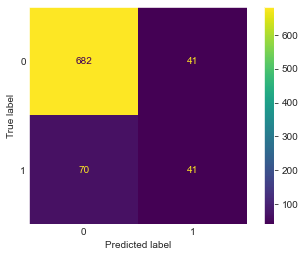

In [66]:
rf_prediction = rf.predict(X_test)

plot_confusion_matrix(dt,X_test,y_test)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

In [67]:
TN, FP, FN, TP = confusion_matrix(y_test, rf_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  67
False Positive(FP) =  66
True Negative(TN)  =  657
False Negative(FN) =  44
Accuracy of the binary classification = 0.868


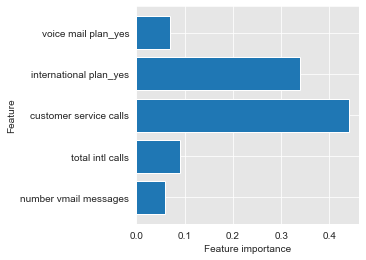

In [70]:
#Visualization of Feature importance for Random Forests
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4,4))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf)

In [68]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       723
           1       0.50      0.60      0.55       111

    accuracy                           0.87       834
   macro avg       0.72      0.76      0.74       834
weighted avg       0.88      0.87      0.87       834



#### Interpretation of classificatiion report
Precision: Out of all the customer that the model predicted would get turnover, only 50% actually did.

Recall: Out of all the cusomters that actually did turnover, the model only predicted this outcome correctly for 60% of those players

f1 score: with an f1 score of 0.55, the model did a poor job of predicting whether or not customers will turnover('churn').


#### The Confusion matrix performance on the Random Forests classifier shows accuracy score of 88%

## Summary of findings

Looking at Odds ratio, we see that International Plan, has an odds ratio greater than one. They are 7 times more likely to leave.

Also customers who have made customer service calls are 55% more likely to leave.

Customers who make international calls are 8% less likely to leave, and customers who have a voicemail plan are 84% less likely to leave

For Logistic Regression, the model had an accuracy score of 0.70

For KNN, the model had an accuracy score of 0.87

For Decision Trees, the model had an accuracy score of 0.87

For Random Forests, the model had an accuracy score of 0.87

Because KNN, Decision Trees, and RandomForests, have the same accuracy. The next best deciding factor is the f1 score. 

For KNN, the model had an f1 score of 0.42

For Decison Trees, the model had an f1 score of 0.42

For Random Forests, the model had an f1 score of 0.55

***RANDOM FORESTS IS THE BEST MODEL***

For Logistic Regression, The area under the ROC Curve, is 78.5

Plotting feature importances, using Decision Trees. customer services calls and then total international calls were top two important features
